# 3.2. Linear Regression Implementation from Scratch

In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import torch
import random

## Generating Data Sets

$ y = Xw + b + \epsilon $

In [2]:
num_inputs = 2
num_examples = 1000

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features = torch.zeros(size=(num_examples, num_inputs)).normal_()
labels = torch.matmul(features, true_w) + true_b
labels += torch.zeros(size=labels.shape).normal_(std=0.01)

In [3]:
features[0], labels[0]

(tensor([-0.2438,  2.0023]), tensor(-3.0861))

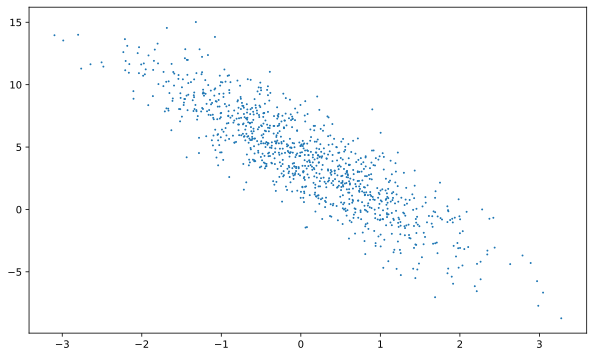

In [4]:
def use_svg_display():
    '''Display in vector graphics'''
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

## Reading Data

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i+batch_size, num_examples)])
        yield features[j], labels[j]

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.9072, -0.7404],
        [-0.0782,  0.5726],
        [-1.7229,  1.1761],
        [ 0.5187,  0.0085],
        [ 0.1982, -1.1288],
        [-0.0845, -0.6985],
        [-1.0821, -1.7102],
        [-0.3747,  1.0335],
        [-0.7355, -1.0766],
        [-0.0738,  0.7959]]) tensor([ 8.5411,  2.1192, -3.2308,  5.2108,  8.4245,  6.4001,  7.8571, -0.0683,
         6.3933,  1.3547])


In [11]:
print(len(features))
print(features.shape)

1000
torch.Size([1000, 2])


## Initialize Model Parameters

In [12]:
w = torch.zeros(size=(num_inputs, 1)).normal_(std=0.01)
b = torch.zeros(size=(1,))

In [16]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

## Define the Model

In [17]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

## Define the Loss Function

In [18]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## Define the Optimization Algorithm

In [19]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

## Training

In [21]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.mean().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print('epoch {}, loss {}'.format(epoch + 1, train_l.mean().numpy()))

epoch 1, loss 1.558271050453186
epoch 2, loss 0.8689043521881104
epoch 3, loss 0.48481157422065735
epoch 4, loss 0.2706603705883026
epoch 5, loss 0.15121373534202576
epoch 6, loss 0.08453559875488281
epoch 7, loss 0.04730096086859703
epoch 8, loss 0.02649369090795517
epoch 9, loss 0.014858193695545197
epoch 10, loss 0.00834984052926302


In [22]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w tensor([ 0.0247, -0.0813], grad_fn=<SubBackward0>)
Error in estimating b tensor([0.0995], grad_fn=<RsubBackward1>)
